In [1]:
import numpy as np

In [2]:
import matplotlib.pylab as lab

In [23]:
def split_area(point1 = 0, point2 = 9, N = 10):
    d_ = (point2 - point1) / (N - 1)
    points = [(point1 + (d_*i)) for i in range(N)]
    return points

In [24]:
def f(x):
    return (x+1) * np.cos(1/x)

N = 10
M = 50
a = 1
b = (2 * np.pi) + 1

## 1 Разбиение отрезка на N частей

In [27]:
points = split_area(a, b, N)
print(points)

[1.0, 1.698131700797732, 2.396263401595464, 3.0943951023931953, 3.792526803190927, 4.490658503988659, 5.1887902047863905, 5.886921905584122, 6.585053606381854, 7.283185307179586]


## 2 Значение f(x) в узлах интерполяции

In [28]:
values = [f(x) for x in points]
print(values)

[1.0806046117362795, 2.243663542665429, 3.104795804067537, 3.8824490759289367, 4.626888957132072, 5.355083704142243, 6.074212820282886, 6.787798991959548, 7.497761442923166, 8.205230611913178]


## 3 Построить интерполяционный полином Ньютона

In [29]:
def Newtonian(x, points, values):
    
    n = len(points)
    step = points[1] - points[0]
    
    def delta(p: int, i: int):
        if p == 1:
            return values[i] - values[i - 1]
        else:
            return delta(p - 1, i) - delta(p - 1, i - 1)
        
    def factorial(val: int):
        if val == 0:
            return 1
        else:
            return val * factorial(val - 1)
    
    
    def C_j(j: int):
        if j == 0:
            return values[0]
        else:
            return delta(j, j) / (factorial(j) * np.power(step, j))
    
    
    result = C_j(0)
    for j in range(1, n):
        s = C_j(j)
        for k in range(j):
            s *= x - points[k]
        result += s
        
    return result

### \* Полином Лагранжа \*

In [30]:
def Lagrangian(x, points, values):
    accum = 0
    for i, (x_i, f_x_i) in enumerate(zip(points, values)):
        poli = 1
        
        for j, x_j in enumerate(points):
            if j == i:
                continue
            else:
                poli *= (x - x_j) / (x_i - x_j)
                
        accum += f_x_i * poli
        
    return accum

## 4 Разбиение отрезка на M частей

In [31]:
_points = split_area(a, b, M)
print(_points)

[1.0, 1.1282282715750935, 1.256456543150187, 1.3846848147252808, 1.5129130863003744, 1.6411413578754679, 1.7693696294505616, 1.8975979010256552, 2.0258261726007487, 2.1540544441758422, 2.2822827157509358, 2.4105109873260293, 2.5387392589011233, 2.6669675304762164, 2.7951958020513104, 2.923424073626404, 3.0516523452014974, 3.179880616776591, 3.3081088883516845, 3.436337159926778, 3.5645654315018716, 3.6927937030769655, 3.821021974652059, 3.9492502462271526, 4.077478517802247, 4.20570678937734, 4.333935060952433, 4.462163332527527, 4.590391604102621, 4.718619875677714, 4.846848147252808, 4.975076418827902, 5.103304690402995, 5.231532961978089, 5.359761233553182, 5.487989505128276, 5.616217776703369, 5.744446048278463, 5.872674319853556, 6.00090259142865, 6.129130863003743, 6.257359134578837, 6.385587406153931, 6.513815677729024, 6.642043949304118, 6.770272220879211, 6.898500492454305, 7.026728764029398, 7.154957035604492, 7.283185307179586]


## 5 Выведение таблицы

In [32]:
print("|x_i       |f(x_i)    |L(x_i)           |N(x_i)           |")
print("|----------|----------|-----------------|-----------------|")
for x_i, f_x_i, L_x_i, N_x_i in zip(
    _points,
    [f(x) for x in _points],
    [Lagrangian(x, points, values) for x in _points],
    [Newtonian(x, points, values) for x in _points]
):
    print(f'|{x_i:.8f}|{f_x_i:.8f}|{L_x_i:.15f}|{N_x_i:.15f}|')
    print("|----------|----------|-----------------|-----------------|")

|x_i       |f(x_i)    |L(x_i)           |N(x_i)           |
|----------|----------|-----------------|-----------------|
|1.00000000|1.08060461|1.080604611736280|1.080604611736280|
|----------|----------|-----------------|-----------------|
|1.12822827|1.34556735|1.341117187092736|1.341117187092733|
|----------|----------|-----------------|-----------------|
|1.25645654|1.57872944|1.574379679177955|1.574379679177949|
|----------|----------|-----------------|-----------------|
|1.38468481|1.78937809|1.786511064689580|1.786511064689582|
|----------|----------|-----------------|-----------------|
|1.51291309|1.98367636|1.982310152692365|1.982310152692363|
|----------|----------|-----------------|-----------------|
|1.64114136|2.16581645|2.165508236799141|2.165508236799141|
|----------|----------|-----------------|-----------------|
|1.76936963|2.33872142|2.338981650390783|2.338981650390786|
|----------|----------|-----------------|-----------------|
|1.89759790|2.50447738|2.504929103825678

## \* Графики \*

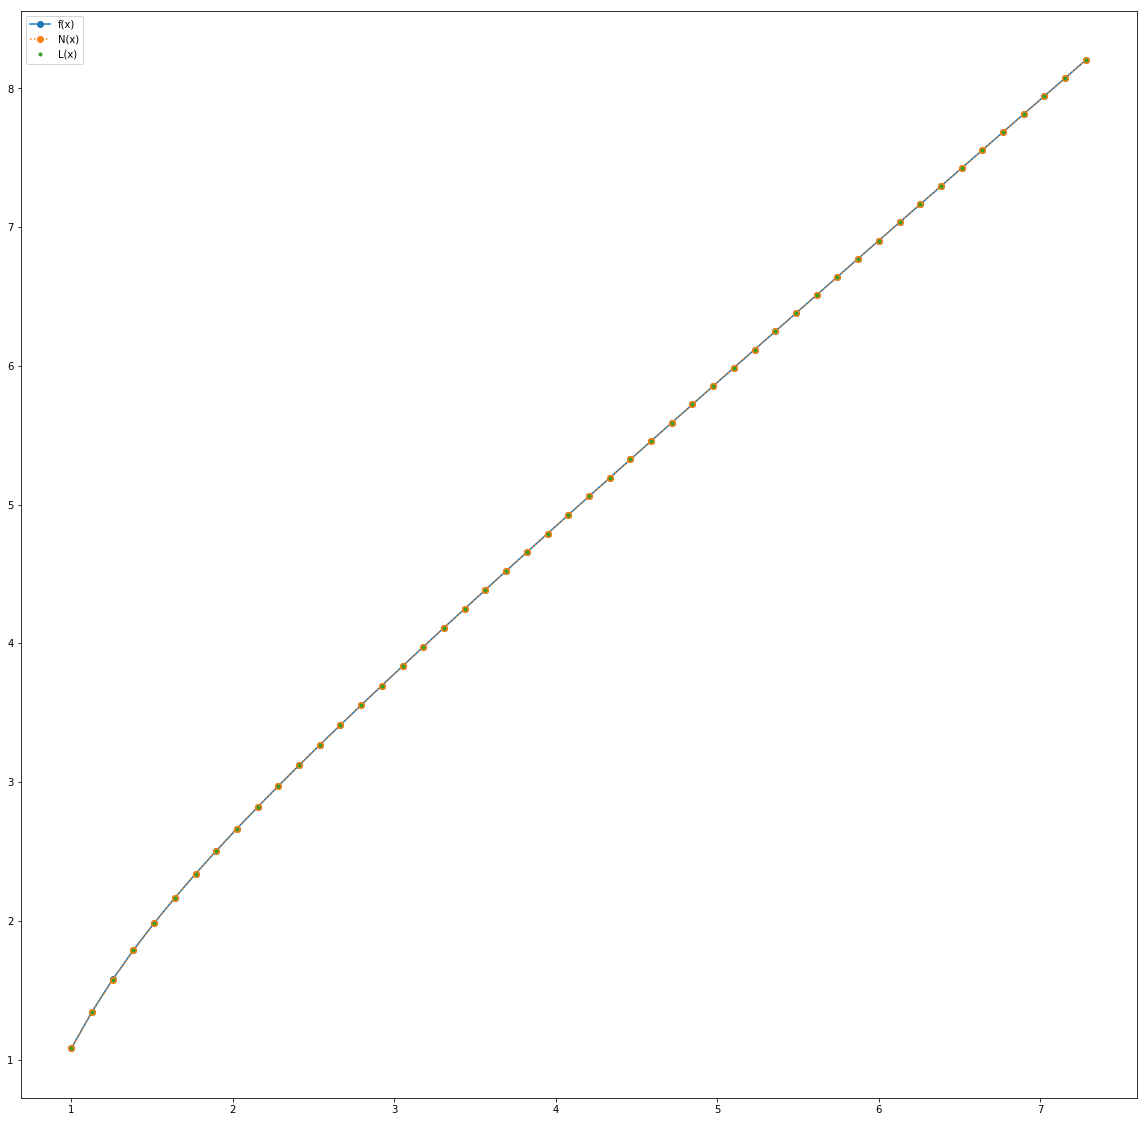

In [33]:
lab.figure(figsize=(20, 20))
lab.plot(_points, [f(x) for x in _points], '-o')
lab.plot(_points, [Newtonian(x=x, points=points, values=values) for x in _points], ':o')
lab.plot(_points, [Lagrangian(points=points, values=values, x=x) for x in _points], '.')
lab.legend(['f(x)', 'N(x)', 'L(x)'], loc='upper left')